## Dataset Description: MNIST Handwritten Digits

The MNIST (Modified National Institute of Standards and Technology) dataset is a widely used benchmark dataset in machine learning and computer vision. It contains 70,000 grayscale images of handwritten digits (0–9). Each image is 28×28 pixels, which is flattened into a 784-dimensional feature vector.

- Number of samples: 70,000
- Number of features per sample: 784 (28×28 pixels)
- Pixel values: 0–255 (grayscale intensity)
- Labels: Digits 0–9
  
This dataset is commonly used for tasks such as classification, clustering, and dimensionality reduction.

## Project Task

- Clustering: Grouping similar handwritten digits based on pixel patterns without using label information.
- Dimensionality Reduction: Reducing the high-dimensional 784-feature data to a lower-dimensional space for:
- Visualization of patterns and clusters
- Improving computational efficiency for clustering algorithms

Techniques such as PCA (Principal Component Analysis), t-SNE, and SVD (Singular Value Decomposition) will be applying for dimensionality reduction.

### Importing libraries

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

### Load data

In [91]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [248]:
X = mnist.data.astype('float32') / 255.0
y = mnist.target.astype('int')

### Dataset Overview

In [4]:
X.shape

(70000, 784)

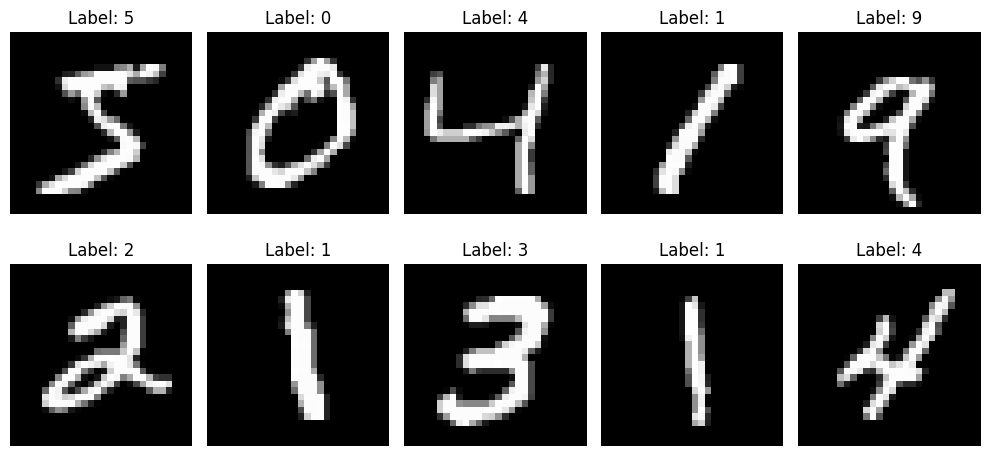

In [5]:
# checking the dataset by showing different inputs
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    image = X.iloc[i].to_numpy().reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

### Preprocessing

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#### Difference in dataset after scaling

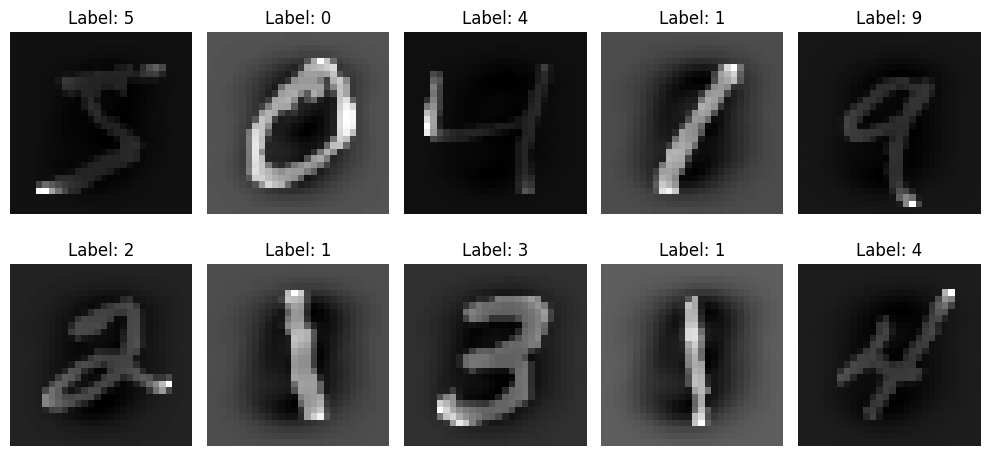

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    image = X_scaled.iloc[i].to_numpy().reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

### PCA for Visualization

In [9]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

In [10]:
y = mnist.target.astype(int)

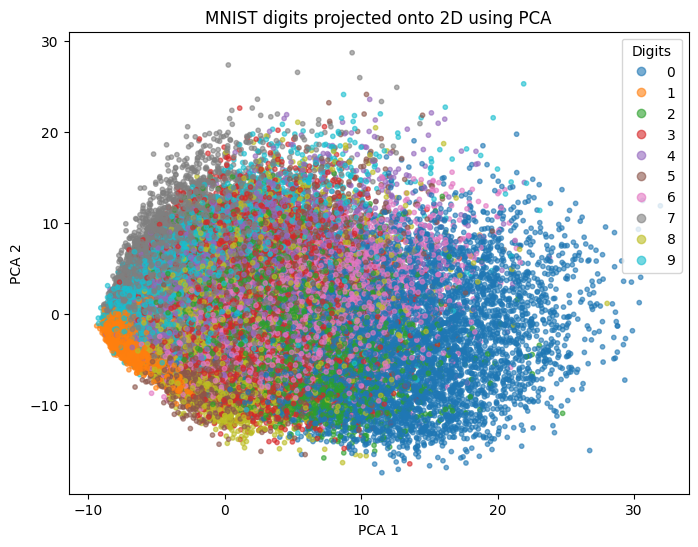

In [11]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=y, cmap='tab10', s=10, alpha=0.6)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("MNIST digits projected onto 2D using PCA")
plt.show()

### PCA for dimensionality reduction (for clustering)

In [12]:
pca_full = PCA()
pca_full.fit(X_scaled)

explained_var = np.cumsum(pca_full.explained_variance_ratio_)

In [13]:
len(explained_var)

784

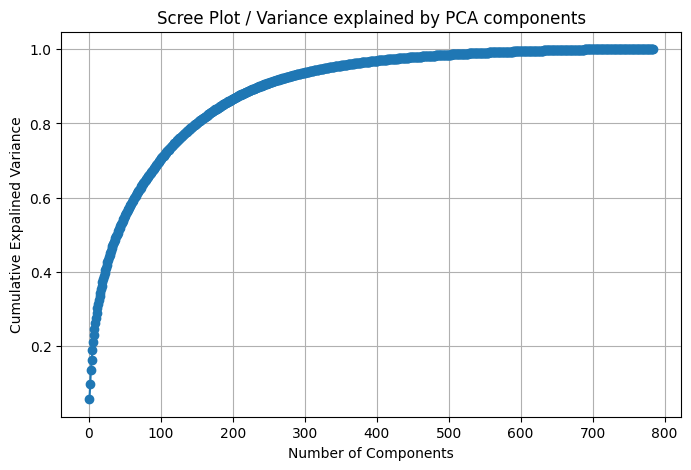

In [14]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,785),explained_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Expalined Variance')
plt.title('Scree Plot / Variance explained by PCA components')
plt.grid(True)
plt.show()

In [17]:
n_components_90 = np.argmax(explained_var >= 0.90) + 1
n_components_90

np.int64(238)

In [20]:
pca_238 = PCA(n_components=238)
X_pca = pca_238.fit_transform(X_scaled)

# Clustering

## K-means

### fit model

In [22]:
kmeans = KMeans(n_clusters=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

In [ ]:
sil_score = silhouette_score(X_pca_50, y_kmeans)
ari_score = adjusted_rand_score(y, y_kmeans)
nmi_score = normalized_mutual_info_score(y, y_kmeans)
print('sil_score: ',sil_score)
print('ari_score: ',ari_score)
print('nmi_score: ',nmi_score)

n_clusters=10 because MNIST has 10 digits (0–9).

Silhouette Score → internal metric (measures how well-separated the clusters are).

Adjusted Rand Index (ARI) → external metric (compares predicted clusters with actual digit labels).

### kmeans with X_pca_50

In [249]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50, random_state=42)
X_pca_50 = pca.fit_transform(X)

In [250]:
kmeans = KMeans(n_clusters=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca_50)

In [251]:
sil_score = silhouette_score(X_pca_50, y_kmeans)
ari_score = adjusted_rand_score(y, y_kmeans)
nmi_score = normalized_mutual_info_score(y, y_kmeans)
print('sil_score: ',sil_score)
print('ari_score: ',ari_score)
print('nmi_score: ',nmi_score)

sil_score:  0.08170195
ari_score:  0.40759041938210666
nmi_score:  0.5207706555417181


In [16]:
X_pca = X_pca_50

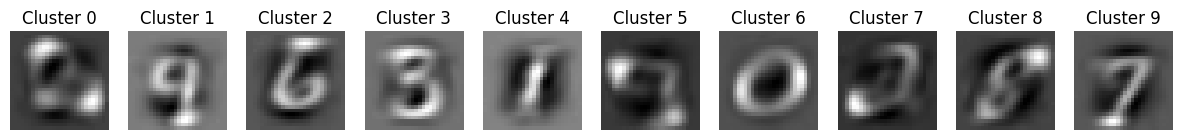

In [18]:
n_clusters = 10

cluster_centers_original = pca.inverse_transform(kmeans.cluster_centers_)

fig, axes = plt.subplots(1, n_clusters, figsize=(15, 2))

for c_i in range(n_clusters):
    image = cluster_centers_original[c_i].reshape(28, 28)

    axes[c_i].imshow(image, cmap='gray')
    axes[c_i].set_title(f'Cluster {c_i}')
    axes[c_i].axis('off')

plt.show()


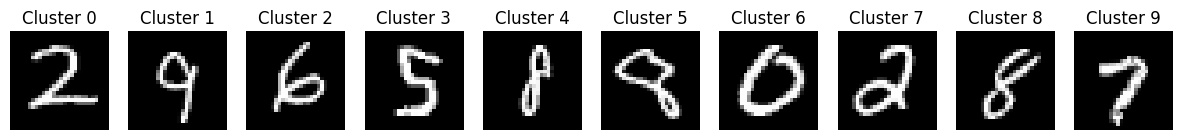

In [20]:
from sklearn.metrics import pairwise_distances_argmin

nearest_instances_idx = pairwise_distances_argmin(kmeans.cluster_centers_, X_pca)

fig, axes = plt.subplots(1, n_clusters, figsize=(15, 2))

for c_i in range(n_clusters):
    image = X.iloc[nearest_instances_idx[c_i]].to_numpy().reshape(28, 28)
    
    axes[c_i].imshow(image, cmap='gray')
    axes[c_i].set_title(f'Cluster {c_i}')
    axes[c_i].axis('off')

plt.show()

In [21]:
kmeans.cluster_centers_[c_i].shape

(50,)

### t-SNE Visualization

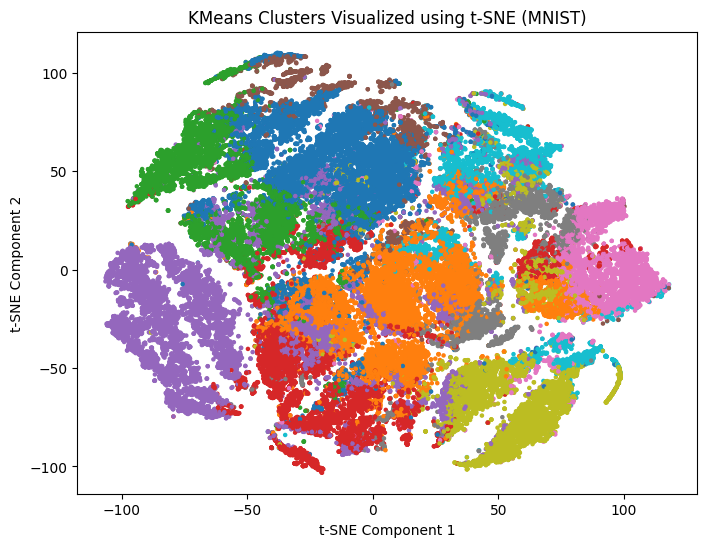

In [29]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_kmeans, cmap='tab10', s=5)
plt.title("KMeans Clusters Visualized using t-SNE (MNIST)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

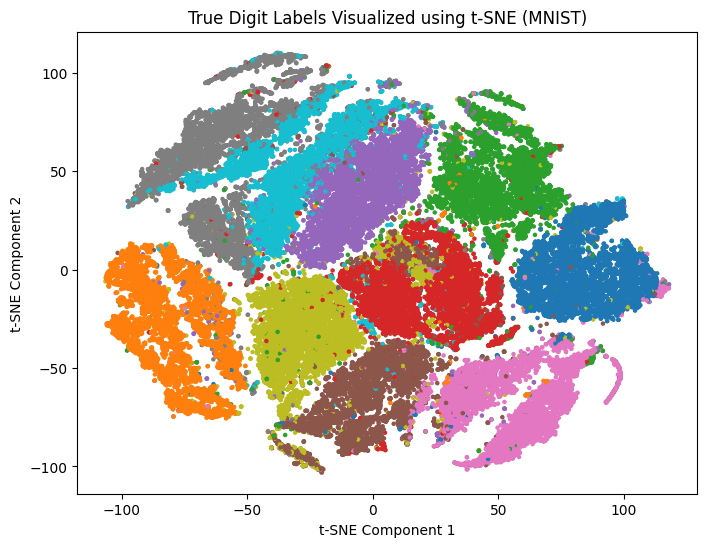

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.astype(int), cmap='tab10', s=5)
plt.title("True Digit Labels Visualized using t-SNE (MNIST)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

### t-SNE on X_pca_50

In [50]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_pca_50)

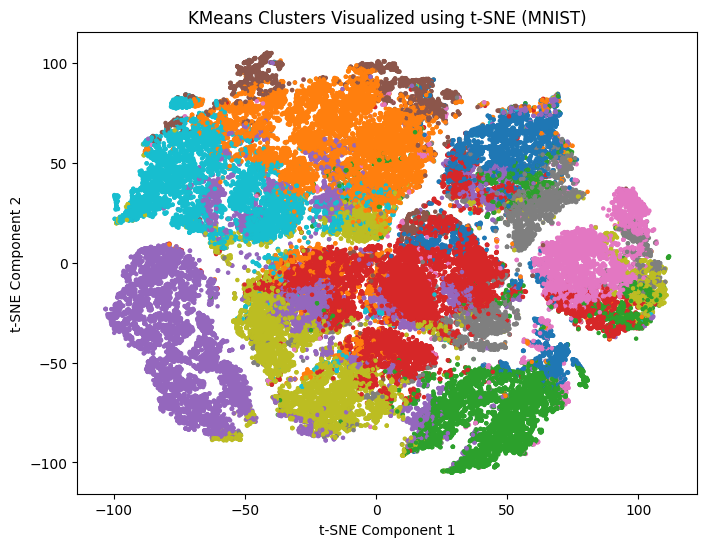

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_kmeans, cmap='tab10', s=5)
plt.title("KMeans Clusters Visualized using t-SNE (MNIST)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

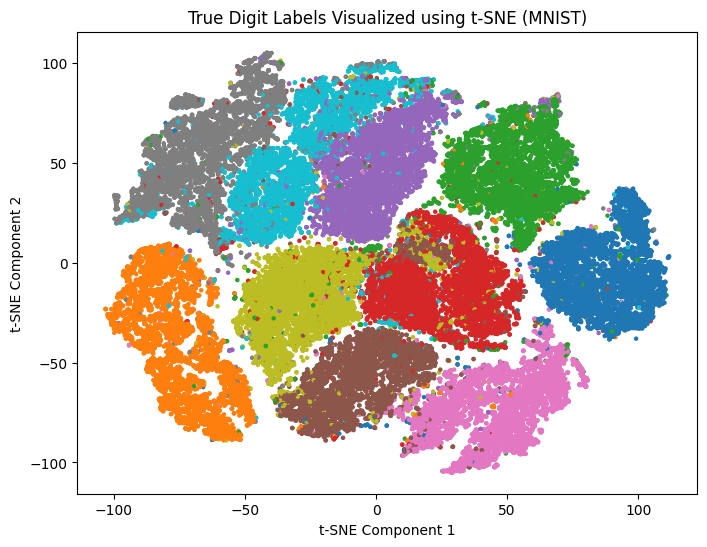

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.astype(int), cmap='tab10', s=5)
plt.title("True Digit Labels Visualized using t-SNE (MNIST)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

### t-SNE on 1k samples

In [36]:
np.random.seed(42)
indices = np.random.choice(len(X), 1000, replace=False)

X_sample = X.iloc[indices]
y_sample = y.iloc[indices]

In [44]:
pca = PCA(n_components=10, random_state=42)
X_sample_pca = pca.fit_transform(X_sample)

In [60]:
kmeans = KMeans(n_clusters=10, random_state=42)
y_kmeans_pca = kmeans.fit_predict(X_sample_pca)

In [61]:
y_kmeans = kmeans.fit_predict(X_sample)

In [46]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne_sample = tsne.fit_transform(X_sample_pca)

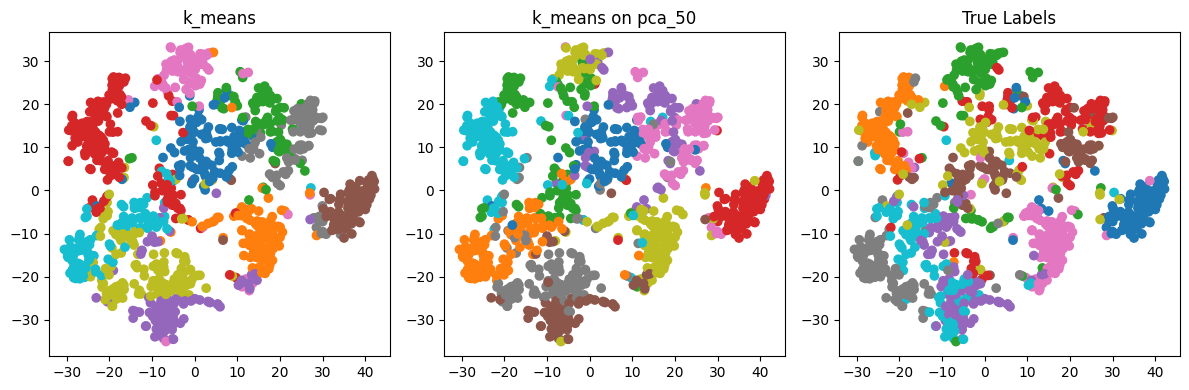

In [75]:
fig, axes = plt.subplots(1,3,figsize=(12,4))

axes[0].scatter(X_tsne_sample[:,0], X_tsne_sample[:,1],c=y_kmeans, cmap='tab10')
axes[0].set_title('k_means')

axes[1].scatter(X_tsne_sample[:,0], X_tsne_sample[:,1],c=y_kmeans_pca, cmap='tab10')
axes[1].set_title('k_means on pca_50')

axes[2].scatter(X_tsne_sample[:,0],X_tsne_sample[:,1],c=y_sample.astype(int), cmap='tab10')
axes[2].set_title('True Labels')

plt.tight_layout()
plt.show()

### Interpretation

For unsupervised learning (like clustering), an ARI around 0.3–0.4 on MNIST is quite normal,
because digits are complex shapes, and KMeans (which assumes spherical clusters) isn’t great at separating them.

After applying PCA, clusters look more compact and better separated.

PCA removes much of the redundant variance and captures the most informative structure, which helps K-Means form more meaningful groups.

Still, a few clusters overlap — that’s expected because PCA is linear, while MNIST’s structure is non-linear.

Overall, this is an improvement over using raw features.

## Hierarchial Clustering

Since hierarchial clustering is computationaly expensive and it took too much time we will be using a sample of the original MNIST dataset.

#### Stratified Sampling

In [155]:
X_sample, _,y_sample, _ = train_test_split(X,y,
                                          stratify=y, 
                                          test_size=0.9, 
                                          random_state=42)
X_sample.shape

(7000, 784)

In [156]:
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_sample)

#### Clustering

In [157]:
agg = AgglomerativeClustering(n_clusters=10, linkage='ward')
y_agg = agg.fit_predict(X_pca)

In [158]:
sil_score = silhouette_score(X_pca, y_agg)
ari_score = adjusted_rand_score(y_sample, y_agg)
nmi_score = normalized_mutual_info_score(y_sample, y_agg)
print('sil_score: ',sil_score)
print('ari_score: ',ari_score)
print('nmi_score: ',nmi_score)

sil_score:  0.053096921651093726
ari_score:  0.4754221548346218
nmi_score:  0.6480003636931108


In [166]:
#best_tuned
agg = AgglomerativeClustering(n_clusters=10, linkage='average', metric='cosine')
y_agg = agg.fit_predict(X_pca)

In [167]:
sil_score = silhouette_score(X_pca, y_agg)
ari_score = adjusted_rand_score(y_sample, y_agg)
nmi_score = normalized_mutual_info_score(y_sample, y_agg)
print('sil_score: ',sil_score)
print('ari_score: ',ari_score)
print('nmi_score: ',nmi_score)

sil_score:  0.057366083939691954
ari_score:  0.5259009668263662
nmi_score:  0.6763442967140495


- Silhouette Score (0.05):
Measures how well-separated and cohesive the clusters are.
The value is close to 0, indicating that clusters are slightly overlapping and not very compact — a common outcome for high-dimensional image data like MNIST.

- Adjusted Rand Index (ARI = 0.47):
Compares the clustering results with the true labels, adjusting for chance.
A score of 0.47 suggests moderate agreement between predicted clusters and actual digit labels, meaning the model captures some underlying structure of the data.

- Normalized Mutual Information (NMI = 0.65):
Measures the shared information between true and predicted labels, scaled between 0 and 1.
A value of 0.65 shows a fairly strong correspondence, indicating that clusters share a good amount of information with the true digit classes.

#### Visualisation

Text(0.5, 1.0, 'Visualised using t-SNE')

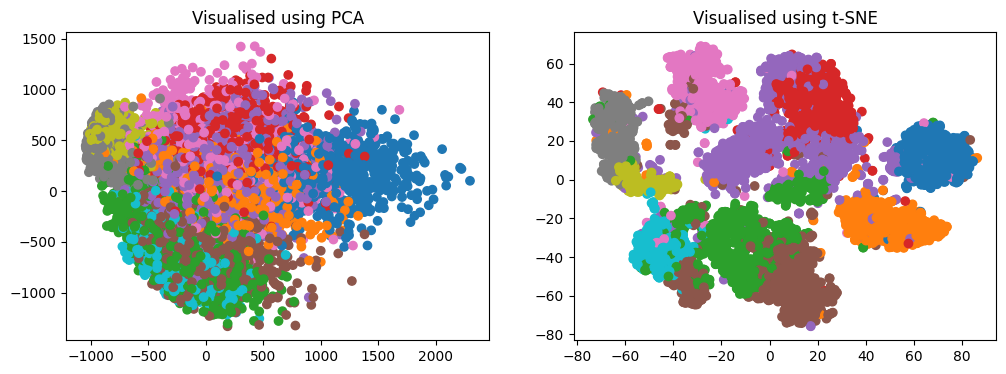

In [144]:
pca_vis = PCA(n_components=2, random_state=42)
X_pca_vis = pca_vis.fit_transform(X_pca)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_pca)

fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].scatter(X_pca_vis[:,0], X_pca_vis[:,1],c=y_agg, cmap='tab10')
axes[0].set_title('Visualised using PCA')

axes[1].scatter(X_tsne[:,0],X_tsne[:,1],c=y_agg, cmap='tab10')
axes[1].set_title('Visualised using t-SNE')

#### Actual vs Agglomerative Clustering

Text(0.5, 1.0, 'Actual')

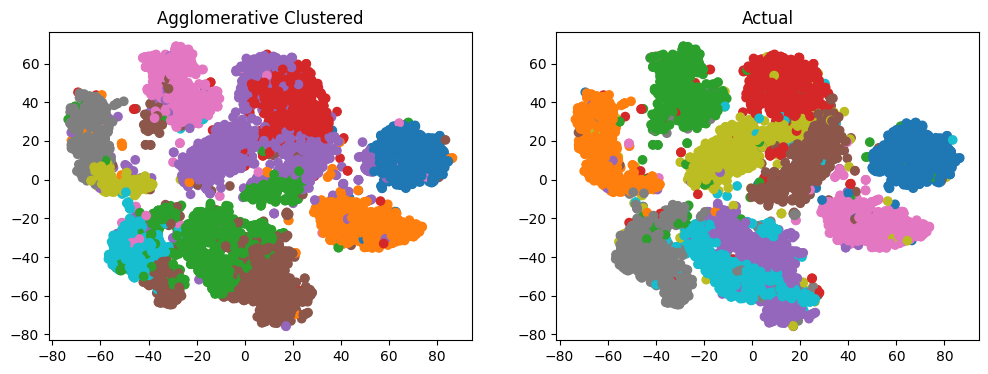

In [148]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

axes[0].scatter(X_tsne[:,0],X_tsne[:,1],c=y_agg, cmap='tab10')
axes[0].set_title('Agglomerative Clustered')

axes[1].scatter(X_tsne[:,0],X_tsne[:,1],c=y_sample.astype(int), cmap='tab10')
axes[1].set_title('Actual')

#### Tuning linkage  & metric parameters

Clustering Linkages: 100%|███████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.91s/it]


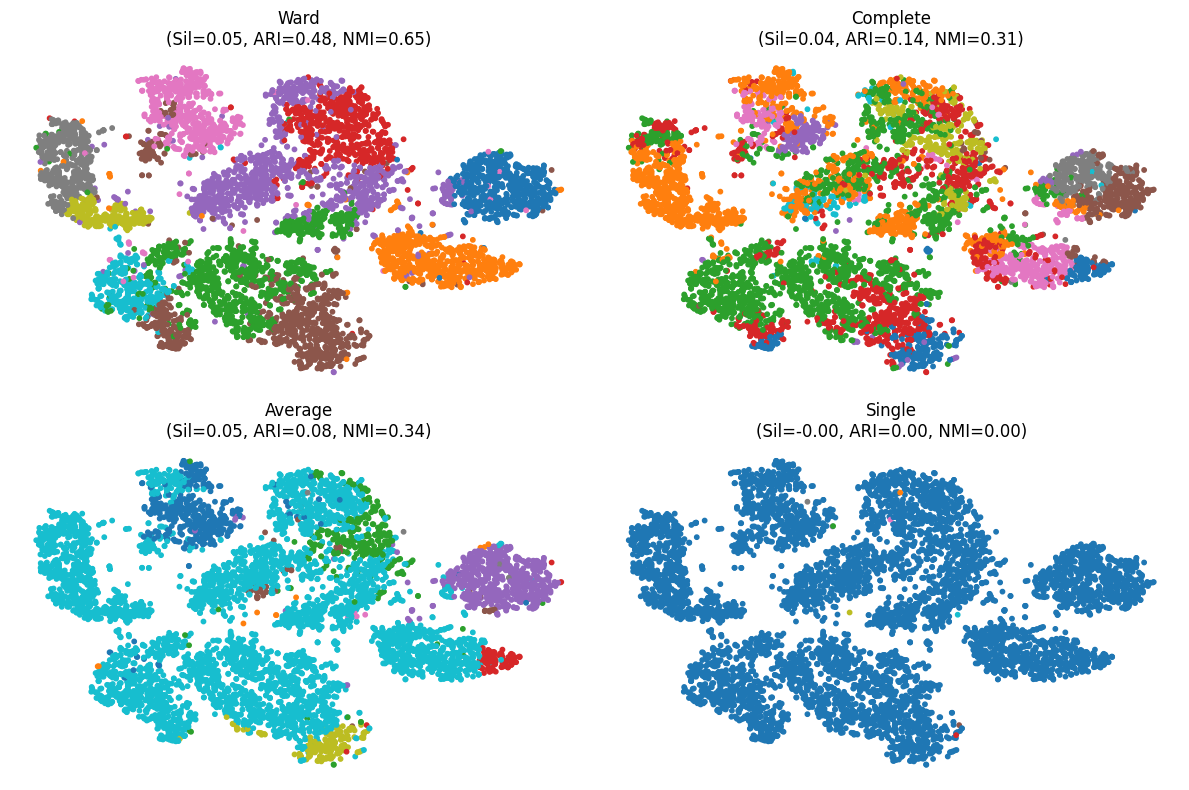

In [154]:
from tqdm import tqdm
linkages = ['ward','complete','average','single']
X_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X_pca)

fig, axes = plt.subplots(2,2, figsize=(12,8))
axes = axes.flatten()

for i,link in enumerate(tqdm(linkages, desc="Clustering Linkages")):
    hc = AgglomerativeClustering(n_clusters=10, linkage=link)
    y_hc = hc.fit_predict(X_pca)

    sil = silhouette_score(X_pca, y_hc)
    ari = adjusted_rand_score(y_sample, y_hc)
    nmi = normalized_mutual_info_score(y_sample, y_hc)

    axes[i].scatter(X_tsne[:,0],X_tsne[:,1],c=y_hc, cmap='tab10',s=10)
    axes[i].set_title(f"{link.capitalize()}\n(Sil={sil:.2f}, ARI={ari:.2f}, NMI={nmi:.2f})")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Ward linkage produced the most distinct and compact clusters with the highest Silhoutte, ARI, and NMI scores.

In [164]:
linkages = ['ward', 'complete', 'average']
metrics = ['euclidean', 'manhattan', 'cosine']

for link in linkages:
    for metric in metrics:
        if link == 'ward' and metric != 'euclidean':
            continue 
        hc = AgglomerativeClustering(n_clusters=10, linkage=link, metric=metric)
        labels = hc.fit_predict(X_pca)
        sil = silhouette_score(X_pca, labels)
        print(f"Linkage={link}, Metric={metric}, Silhouette={sil:.3f}")

Linkage=ward, Affinity=euclidean, Silhouette=0.053
Linkage=complete, Affinity=euclidean, Silhouette=0.037
Linkage=complete, Affinity=manhattan, Silhouette=0.012
Linkage=complete, Affinity=cosine, Silhouette=0.028
Linkage=average, Affinity=euclidean, Silhouette=0.047
Linkage=average, Affinity=manhattan, Silhouette=-0.005
Linkage=average, Affinity=cosine, Silhouette=0.057


#### Dendrogram

In [169]:
X_sample, _,y_sample, _ = train_test_split(X,y,
                                          stratify=y, 
                                          test_size=0.99, 
                                          random_state=42)
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_sample)

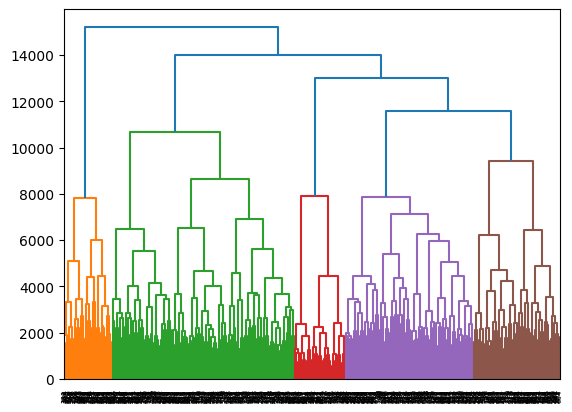

In [171]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X_pca, method='ward')
dendrogram(Z)
plt.show()

#### Interpretation

Agglomerative clustering moderately captures the structure of the MNIST dataset. While cluster compactness is low, the ARI and NMI values indicate a reasonable level of label consistency, making the method somewhat effective for unsupervised digit grouping.

## DBScan

#### Preprocess

In [194]:
sample_size=10000
X_sample, _, y_sample, _ = train_test_split(X,y,
                                           train_size=sample_size,
                                           stratify=y,
                                           random_state=42)
print('Sample Shape: ',X_sample.shape)
print('Label Distribution: ',np.bincount(y_sample.astype(int)))

Sample Shape:  (10000, 784)
Label Distribution:  [ 986 1125  999 1020  975  902  982 1042  975  994]


In [196]:
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_sample)

#### Fitting

In [198]:
eps = 5
min_samples = 5

dbscan = DBSCAN(eps=eps,min_samples=min_samples, metric='euclidean')
y_db = dbscan.fit_predict(X_pca)

In [200]:
n_noise = np.sum(y_db == -1)
print("Number of noise points:", n_noise)

Number of noise points: 714


Text(0.5, 1.0, 't-SNE Visualized DB Clustering')

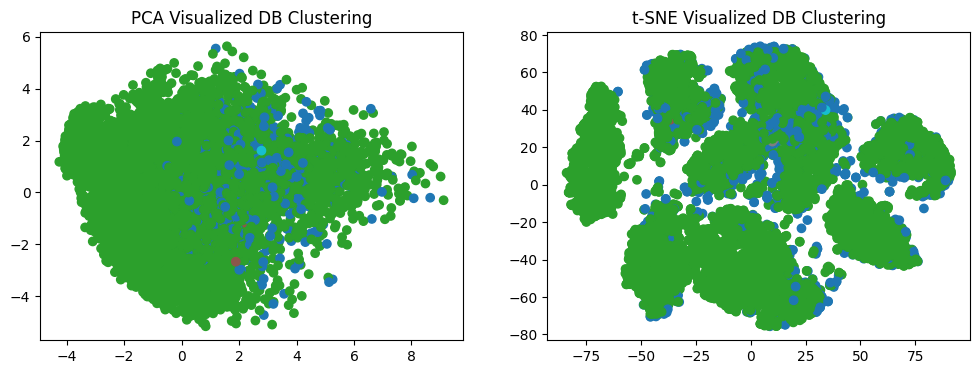

In [207]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

pca_2d = PCA(n_components=2, random_state=42)
X_2d_pca = pca_2d.fit_transform(X_pca)

tsne_2d = TSNE(n_components=2,perplexity=30, random_state=42)
X_2d_tsne = tsne_2d.fit_transform(X_pca)

axes[0].scatter(X_2d_pca[:,0], X_2d_pca[:,1], c=y_db, cmap='tab10')
axes[0].set_title('PCA Visualized DB Clustering')
axes[1].scatter(X_2d_tsne[:,0], X_2d_tsne[:,1], c=y_db, cmap='tab10')
axes[1].set_title('t-SNE Visualized DB Clustering')

In [205]:
sil_score = silhouette_score(X_pca, y_db)
ari_score = adjusted_rand_score(y_sample, y_db)
nmi_score = normalized_mutual_info_score(y_sample, y_db)
print('sil_score: ',sil_score)
print('ari_score: ',ari_score)
print('nmi_score: ',nmi_score)

sil_score:  -0.025284382
ari_score:  0.0021887857167143194
nmi_score:  0.019683488304156695


#### Tune eps and min_samples

In [211]:
from sklearn.neighbors import NearestNeighbors

min_samples = 5

neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)

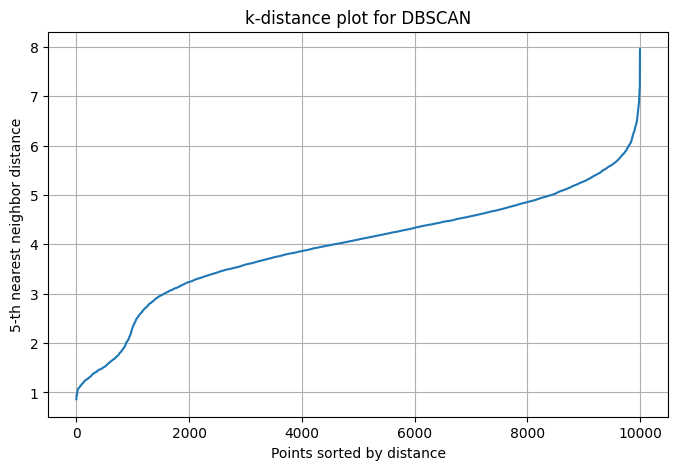

In [218]:
k_distances = distances[:, -1]
k_distances = np.sort(k_distances)

plt.figure(figsize=(8,5))
plt.plot(k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}-th nearest neighbor distance')
plt.title('k-distance plot for DBSCAN')
plt.grid(True)
plt.show()

For this plot, a reasonable eps is around 6.

If you choose slightly lower (5–5.5), you’ll get more noise points but possibly cleaner clusters.

If you choose slightly higher (6.5–7), clusters may merge, and DBSCAN may detect fewer clusters.

In [221]:
dbscan = DBSCAN(eps=6, min_samples=5, metric='euclidean')
y_db = dbscan.fit_predict(X_pca)

from collections import Counter
print("Cluster label counts:", Counter(y_db))

Cluster label counts: Counter({np.int64(0): 9944, np.int64(-1): 56})


Cluster 0: 9,944 samples

Noise (-1): 56 samples

eps is too large → DBSCAN merges all sub-clusters into one big cluster.

In [224]:
for eps in [4, 4.5, 5]:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_pca)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"eps={eps} - clusters={n_clusters}, noise={np.sum(labels == -1)}")

eps=4 - clusters=44, noise=3980
eps=4.5 - clusters=16, noise=1852
eps=5 - clusters=4, noise=714


In [225]:
for eps in [4.5, 4.6, 4.7, 4.8, 4.9]:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_pca)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"eps={eps} - clusters={n_clusters}, noise={np.sum(labels == -1)}")

eps=4.5 - clusters=16, noise=1852
eps=4.6 - clusters=11, noise=1529
eps=4.7 - clusters=7, noise=1279
eps=4.8 - clusters=6, noise=1081
eps=4.9 - clusters=1, noise=879


In [233]:
eps_values = [4.5, 4.6, 4.7, 4.8, 4.9]
min_samples_values = [5, 10, 20, 50, 100]

results = []

for eps in eps_values:
    for m in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=m)
        labels = db.fit_predict(X_pca)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = np.sum(labels == -1)
        
        if n_clusters > 1:
            sil = silhouette_score(X_pca[labels != -1], labels[labels != -1])
        else:
            sil = np.nan
        
        results.append((eps, m, n_clusters, n_noise, sil))
        print(f"eps={eps:.1f}, min_samples={m:3d} → clusters={n_clusters:2d}, noise={n_noise:5d}, silhouette={sil:.3f}")

eps=4.5, min_samples=  5 → clusters=16, noise= 1852, silhouette=-0.131
eps=4.5, min_samples= 10 → clusters= 8, noise= 2755, silhouette=-0.035
eps=4.5, min_samples= 20 → clusters= 4, noise= 4084, silhouette=0.130
eps=4.5, min_samples= 50 → clusters= 1, noise= 6229, silhouette=nan
eps=4.5, min_samples=100 → clusters= 3, noise= 7462, silhouette=0.073
eps=4.6, min_samples=  5 → clusters=11, noise= 1529, silhouette=-0.107
eps=4.6, min_samples= 10 → clusters= 4, noise= 2372, silhouette=0.067
eps=4.6, min_samples= 20 → clusters= 3, noise= 3575, silhouette=0.128
eps=4.6, min_samples= 50 → clusters= 2, noise= 5845, silhouette=0.090
eps=4.6, min_samples=100 → clusters= 2, noise= 7170, silhouette=0.136
eps=4.7, min_samples=  5 → clusters= 7, noise= 1279, silhouette=-0.102
eps=4.7, min_samples= 10 → clusters= 5, noise= 1965, silhouette=-0.011
eps=4.7, min_samples= 20 → clusters= 1, noise= 3096, silhouette=nan
eps=4.7, min_samples= 50 → clusters= 3, noise= 5331, silhouette=0.087
eps=4.7, min_sample

In [234]:
df_results = pd.DataFrame(results, columns=["eps", "min_samples", "n_clusters", "n_noise", "silhouette"])
df_results.sort_values(by="silhouette", ascending=False, inplace=True)
print(df_results)

    eps  min_samples  n_clusters  n_noise  silhouette
23  4.9           50           2     4348    0.198888
18  4.8           50           3     4833    0.179079
14  4.7          100           2     6692    0.144231
9   4.6          100           2     7170    0.136212
2   4.5           20           4     4084    0.130351
7   4.6           20           3     3575    0.127587
8   4.6           50           2     5845    0.089981
13  4.7           50           3     5331    0.087404
17  4.8           20           2     2670    0.083422
4   4.5          100           3     7462    0.073337
16  4.8           10           2     1581    0.072755
6   4.6           10           4     2372    0.067144
22  4.9           20           3     2187    0.056915
21  4.9           10           2     1289    0.020833
11  4.7           10           5     1965   -0.011072
1   4.5           10           8     2755   -0.034891
10  4.7            5           7     1279   -0.101759
15  4.8            5        

In [236]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_pca) 

In [246]:
y_db_1 = DBSCAN(eps=4.7, min_samples=20).fit_predict(X_pca)
y_db_2 = DBSCAN(eps=4.8, min_samples=50).fit_predict(X_pca)
y_db_3 = DBSCAN(eps=4.9, min_samples=50).fit_predict(X_pca)

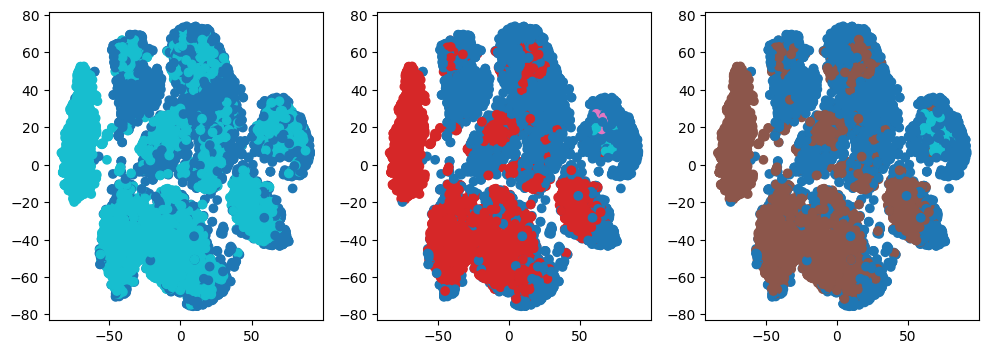

In [247]:
y_db = [y_db_1, y_db_2, y_db_3]

fig, axes = plt.subplots(1,3,figsize=(12,4))
for i,y in enumerate(y_db):
    axes[i].scatter(X_tsne[:,0], X_tsne[:,1],c=y, cmap='tab10')

#### Interpretation

DBSCAN was applied on PCA-reduced MNIST data to find digit clusters. Despite parameter tuning, it formed only 2–3 broad clusters with high noise. Visualizations using t-SNE showed overlapping digits. Due to uneven density and high dimensionality, DBSCAN is unsuitable for MNIST

# Comparing different Clustering models